## Building a  movie Recommendation System based on average weighted values

In [6]:
import pandas as pd
import numpy as np


credits = pd.read_csv("tmdb_5000_credits.csv")
movies_df = pd.read_csv("tmdb_5000_movies.csv")


credits.head(n=3)


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### cast is present in dictonary format

In [8]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

Credits: (4803, 4)
Movies Dataframe: (4803, 20)


## similary movies_df have 20 cols

###  "movie_id" of credits is mapped to "id " of movies_df  , so we will rename both to a common name and then merge both the tables 

In [10]:
credits_column_renamed = credits.rename(columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
# movies_df_merge.head(n=1)

## Now we will drop the columns which are off no use

In [11]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_cleaned_df.head(n=1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [12]:
movies_cleaned_df.shape

(4803, 18)

In [13]:
movies_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
tagline                 3959 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 712.9+ KB


### Say if only one person has watched the movie and rated that movie so we cant say anything about the movie hence we use the concept of weighted average

### Using Weighted average for each movie's  Average Rating

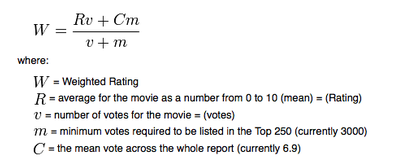


                  Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page---------------------------

In [15]:
# Calculate all the components based on the above formula
# here we considering 70 percentage of the movies to be the critera for selection i.e minimum votes across 

v=movies_cleaned_df['vote_count']
R=movies_cleaned_df['vote_average']
C=movies_cleaned_df['vote_average'].mean()
m=movies_cleaned_df['vote_count'].quantile(0.70)

### adding a new column weighted average to the movie

In [16]:
movies_cleaned_df['weighted_average']=((R*v)+ (C*m))/(v+m)
print(movies_cleaned_df.shape)

(4803, 19)


In [17]:
# Descending sort on the basics of weighted average

movie_sorted_ranking=movies_cleaned_df.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(3)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391


## Visulazing the plot by seaborn and matplot lib

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

movie_sorted_ranking=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
sns.barplot(x=movie_sorted_ranking['weighted_average'].head(10), y=movie_sorted_ranking['original_title'].head(10))


plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('best_movies.png')

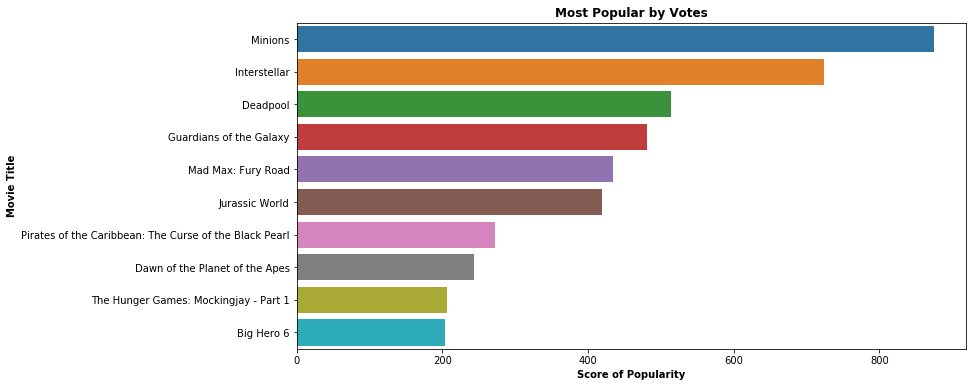

In [19]:
popularity=movie_sorted_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))

ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10))

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

### Now considering scaled weighted average and popularity score both for recommendation (Priority is given 50% to both)

### As both popularity and weighted average are on different scale hence to generalize we use MinMaxScaler

### Transform features by scaling each feature to a given range.

### This estimator scales and translates each feature individually such that it is in the given range on the training set

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned_df[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head(n=3)

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635


In [22]:
print(movies_cleaned_df.shape)
print(movie_normalized_df.shape)
movies_cleaned_df[['normalized_weight_average','normalized_popularity']]= movie_normalized_df
print(movies_cleaned_df.shape)

(4803, 21)
(4803, 2)
(4803, 21)


In [34]:
movies_cleaned_df['score'] = movies_cleaned_df['normalized_weight_average'] * 0.5 + movies_cleaned_df['normalized_popularity'] * 0.5
print(movies_cleaned_df.shape)
movies_scored_df = movies_cleaned_df.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(3)

(4803, 22)


,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668


Text(0, 0.5, 'Movie Title')

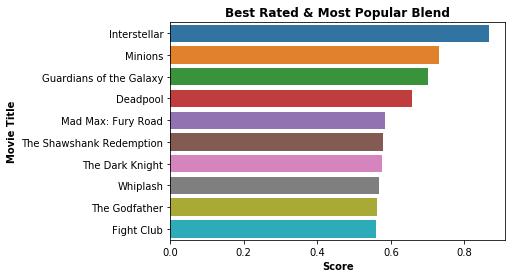

In [36]:

scored_df = movies_cleaned_df.sort_values('score', ascending=False)
sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10))
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')


# Task 2

## Next movie that the user will watch based on user rating

### numpy is used for creating the multidimensional array and pandas are used for creating the data frame

## Data set used here is a subset from movie lens dataset

# There are two types of filtering content base(Netflix) filtering and collaborative filtering(Amazon items)

In [1]:
import numpy as np
import pandas as pd

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

df.head(n=4)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949


In [2]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head(n=4)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)


In [3]:
df = pd.merge(df,movie_titles,on='item_id')
df.head(n=3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


## EDA (Exploratory Data Analysics)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [5]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(n=4)

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

## Raiting of 5 is highely unlikely as say all the users has given the 5 which is not there , it may be the case here that only few users has given the rating and complete 5 stars

In [6]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(n=4)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Name: rating, dtype: int64

## i.e maximum votes are there to star wars that is 584

In [7]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head(n=4)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000


In [8]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head(n=3)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


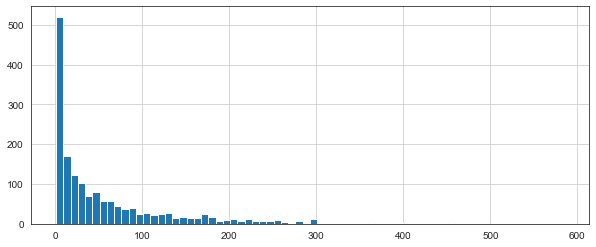

In [16]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

#bins is the number of bars our data is divided into


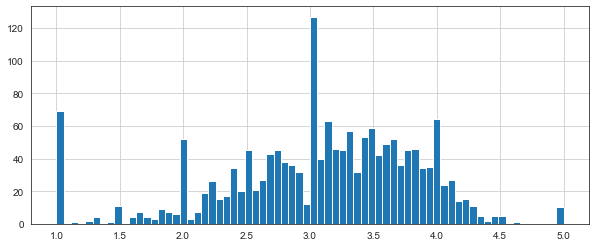

In [17]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

## Here we can see that rating are between mainly 3 and 4 i.e bell shaped curve

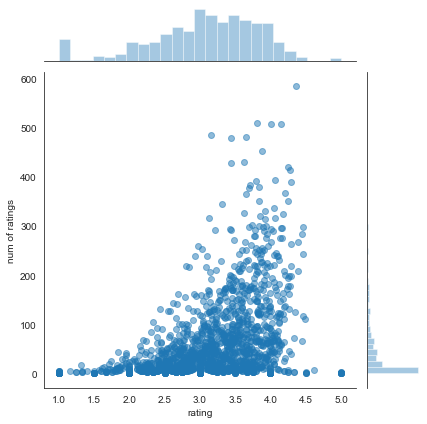

In [20]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommending similar movies

#### Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [21]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head(n=4)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings.sort_values('num of ratings',ascending=False).head(5)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [23]:
ratings.head(n=4)

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125


In [24]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [25]:
# We can then use corrwith() method to get correlations between two pandas series

similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
//anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
## inplace=True is used to remove NaN values

corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


### Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie).

In [27]:
corr_starwars.sort_values('Correlation',ascending=False).head(5)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


### Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [29]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [30]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [31]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
